In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

source_file_path = os.path.abspath("AD_zillow.csv")
parent_folder = os.path.dirname(source_file_path)
grandparent_folder = os.path.dirname(parent_folder)

zillow_file = os.path.join(grandparent_folder,"P1_Resources", "AD_zillow.csv")
zillow_df = pd.read_csv(zillow_file, low_memory=False, encoding="Latin-1")


# To view the headers, you can use the columns attribute of the DataFrame
headers = zillow_df.columns

print(headers)


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
       '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30'],
      dtype='object', length=291)


In [2]:
#Keeping only the years 2019, 2021 and 2022 for review.
columns_to_keep = ['RegionName', 'State', 'City','CountyName', 
                   '2022-01-31', '2022-02-28', '2022-03-31','2022-04-30', '2022-05-31', '2022-06-30',
                   '2022-07-31', '2022-08-31', '2022-09-30','2022-10-31', '2022-11-30', '2022-12-31',
                   
                   '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
                   '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
                   
                   '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
                   '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31']

# Create a new DataFrame with the specified columns
zillow_df_selected = zillow_df[columns_to_keep]

zillow_df_selected.head()

,RegionName,State,City,CountyName,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,...,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31
0,8701,NJ,Lakewood,Ocean County,449590.267897,460790.185143,473920.179413,485765.325284,496446.807959,506343.946927,...,336935.323031,337083.985753,336802.896897,337164.894904,336827.812935,336640.482402,336014.069828,336314.864581,337719.732724,339047.368935
1,77494,TX,Katy,Fort Bend County,448659.592146,456661.820692,465422.589675,473313.790255,480524.947077,486784.942865,...,353667.777304,354280.976588,354562.964355,354517.938946,354180.645431,353690.349489,353629.361969,353826.955678,354493.420257,355392.662157
2,77449,TX,Katy,Harris County,257271.586950,262666.805136,268404.829432,273377.359997,277611.821634,281484.264383,...,202540.700984,203031.349746,203491.411025,203911.608297,204339.343549,204824.662284,205304.213425,205892.414221,206711.989282,207800.119345
3,11368,NY,New York,Queens County,440641.278723,438698.651924,437750.820761,438524.846905,438650.239367,439390.834516,...,386466.996148,392082.190601,396660.464727,400527.869852,404591.661734,408022.572894,410146.417047,410835.166816,412502.921913,414656.965956
4,78660,TX,Pflugerville,Travis County,430952.416012,438733.979106,448143.022846,457839.552819,466048.884485,470946.567925,...,301446.876606,301583.200340,302066.928894,302817.659752,303662.527857,304429.147766,305218.466163,306503.507267,308056.239574,310052.163633


In [3]:
#Creating a DF for crime year 2019:
purchase_columns19 = ['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
                   '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31']


#Selecting columns to pull from original file:
columns_2019 = ['RegionName', 'State', 'City','CountyName', '2019-01-31', '2019-02-28', '2019-03-31', 
                '2019-04-30', '2019-05-31', '2019-06-30','2019-07-31', '2019-08-31',
                '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31']

zillow_df_2019 = zillow_df_selected[columns_2019]

# Convert columns for the year 2022 to integer data type and removing any NAN
zillow_df_2019.dropna(inplace=True)
zillow_df_2019[purchase_columns19] = zillow_df_2019[purchase_columns19].astype(int)

#filtering out to show only Austin, TX
zillow_df_2019 = zillow_df_2019[zillow_df_2019['State'] == 'TX']
zillow_df_2019 = zillow_df_2019[zillow_df_2019['City'] == 'Austin']
zillow_df_2019 = zillow_df_2019.rename(columns={'RegionName': 'Zip Code'})
zillow_df_2019.rename(columns={'2019-01-31': 'January_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-02-28': 'February_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-03-31': 'March_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-04-30': 'April_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-05-31': 'May_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-06-30': 'June_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-07-31': 'July_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-08-31': 'August_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-09-30': 'September_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-10-31': 'October_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-11-30': 'November_19'}, inplace=True)
zillow_df_2019.rename(columns={'2019-12-31': 'December_19'}, inplace=True)
zillow_df_2019.reset_index(drop=True, inplace=True)
zillow_df_2019.set_index('Zip Code', inplace=True)
zillow_df_2019.sort_index(ascending=False, inplace=True)


zillow_df_2019['Year'] = 2019


zillow_df_2019.head()

/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_79625/2580253721.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2019.dropna(inplace=True)
/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_79625/2580253721.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2019[purchase_columns19] = zillow_df_2019[purchase_columns19].astype(int)


,State,City,CountyName,January_19,February_19,March_19,April_19,May_19,June_19,July_19,August_19,September_19,October_19,November_19,December_19,Year
Zip Code,,,,,,,,,,,,,,,,
78759,TX,Austin,Travis County,533118,534334,536008,537899,540109,542289,544585,546651,549189,552409,555662,559071,2019
78758,TX,Austin,Travis County,310676,312377,313778,315376,317524,319850,322342,324659,327210,329972,333039,336427,2019
78757,TX,Austin,Travis County,472124,473480,474943,477276,479433,481344,482945,485377,488306,491701,495381,499043,2019
78756,TX,Austin,Travis County,540963,542093,543839,547243,550308,553599,556161,559459,563248,567780,572345,576002,2019
78754,TX,Austin,Travis County,287389,287458,287202,287075,287528,288206,288843,289394,290230,291804,293550,295567,2019


In [4]:
purchase_columns21 = ['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
                   '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31']

columns_2021 = ['RegionName', 'State', 'City','CountyName', '2021-01-31', '2021-02-28', '2021-03-31', 
                '2021-04-30', '2021-05-31', '2021-06-30','2021-07-31', '2021-08-31',
                '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31']

zillow_df_2021 = zillow_df_selected[columns_2021]


# Convert columns for the year 2022 to integer data type and removing any NAN
zillow_df_2021.dropna(inplace=True)
zillow_df_2021[purchase_columns21] = zillow_df_2021[purchase_columns21].astype(int)


#filtering out to show only Austin, TX
zillow_df_2021 = zillow_df_2021[zillow_df_2021['City'] == 'Austin']
zillow_df_2021 = zillow_df_2021[zillow_df_2021['State'] == 'TX']
zillow_df_2021 = zillow_df_2021.rename(columns={'RegionName': 'Zip Code'})
zillow_df_2021.rename(columns={'2021-01-31': 'January_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-02-28': 'February_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-03-31': 'March_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-04-30': 'April_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-05-31': 'May_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-06-30': 'June_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-07-31': 'July_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-08-31': 'August_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-09-30': 'September_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-10-31': 'October_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-11-30': 'November_21'}, inplace=True)
zillow_df_2021.rename(columns={'2021-12-31': 'December_21'}, inplace=True)
zillow_df_2021.reset_index(drop=True, inplace=True)
zillow_df_2021.set_index('Zip Code', inplace=True)
zillow_df_2021.sort_index(ascending=False, inplace=True)


zillow_df_2021['Year'] = 2021


zillow_df_2021.head()

/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_79625/2031686584.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2021.dropna(inplace=True)
/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_79625/2031686584.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2021[purchase_columns21] = zillow_df_2021[purchase_columns21].astype(int)


,State,City,CountyName,January_21,February_21,March_21,April_21,May_21,June_21,July_21,August_21,September_21,October_21,November_21,December_21,Year
Zip Code,,,,,,,,,,,,,,,,
78759,TX,Austin,Travis County,633281,645984,659445,674460,691192,707073,716257,717360,712965,709537,710461,716625,2021
78758,TX,Austin,Travis County,394824,402351,410069,418805,428578,438684,445661,448346,446860,444705,444094,446324,2021
78757,TX,Austin,Travis County,575027,586473,598295,611340,625477,640309,651906,658236,659033,659717,662730,669017,2021
78756,TX,Austin,Travis County,654476,663929,675102,689546,706357,724547,739383,748537,751558,754517,760378,769835,2021
78754,TX,Austin,Travis County,339493,346794,354677,363763,374050,385102,393558,398720,400796,402362,404658,408119,2021


In [7]:
purchase_columns22 = ['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
                   '2022-07-31', '2022-08-31', '2022-09-30','2022-10-31', '2022-11-30', '2022-12-31']

columns_2022 = ['RegionName', 'State', 'City','CountyName', '2022-01-31', '2022-02-28', '2022-03-31', 
                '2022-04-30', '2022-05-31', '2022-06-30','2022-07-31', '2022-08-31',
                '2022-09-30','2022-10-31', '2022-11-30', '2022-12-31']

zillow_df_2022 = zillow_df_selected[columns_2022]


# Convert columns for the year 2022 to integer data type and removing any NAN
zillow_df_2022.dropna(inplace=True)
zillow_df_2022[purchase_columns22] = zillow_df_2022[purchase_columns22].astype(int)


#filtering out to show only Austin, TX
zillow_df_2022 = zillow_df_2022[zillow_df_2022['City'] == 'Austin']
zillow_df_2022 = zillow_df_2022[zillow_df_2022['State'] == 'TX']
zillow_df_2022 = zillow_df_2022.rename(columns={'RegionName': 'Zip Code'})
zillow_df_2022.rename(columns={'2022-01-31': 'January_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-02-28': 'February_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-03-31': 'March_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-04-30': 'April_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-05-31': 'May_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-06-30': 'June_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-07-31': 'July_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-08-31': 'August_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-09-30': 'September_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-10-31': 'October_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-11-30': 'November_22'}, inplace=True)
zillow_df_2022.rename(columns={'2022-12-31': 'December_22'}, inplace=True)
zillow_df_2022.reset_index(drop=True, inplace=True)
zillow_df_2022.set_index('Zip Code', inplace=True)
zillow_df_2022.sort_index(ascending=False, inplace=True)

zillow_df_2022['Year'] = 2022


zillow_df_2022.head()

/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_79625/3120864559.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2022.dropna(inplace=True)
/var/folders/mp/2rmhnljs2pndsyqr32kfmxcr0000gn/T/ipykernel_79625/3120864559.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_df_2022[purchase_columns22] = zillow_df_2022[purchase_columns22].astype(int)


,State,City,CountyName,January_22,February_22,March_22,April_22,May_22,June_22,July_22,August_22,September_22,October_22,November_22,December_22,Year
Zip Code,,,,,,,,,,,,,,,,
78759,TX,Austin,Travis County,730037,747934,770634,791404,807579,814801,813088,805605,795705,786904,779440,771554,2022
78758,TX,Austin,Travis County,452529,460940,471178,480161,488233,492558,492989,489374,484007,478418,472996,466683,2022
78757,TX,Austin,Travis County,681141,696930,717366,735476,750541,758177,757454,749943,738525,727441,717939,708394,2022
78756,TX,Austin,Travis County,785235,805689,833859,859901,879960,889075,888853,881357,868295,855491,845928,838191,2022
78754,TX,Austin,Travis County,413508,420311,428541,436597,443798,448500,449314,446640,441343,435380,429061,422682,2022


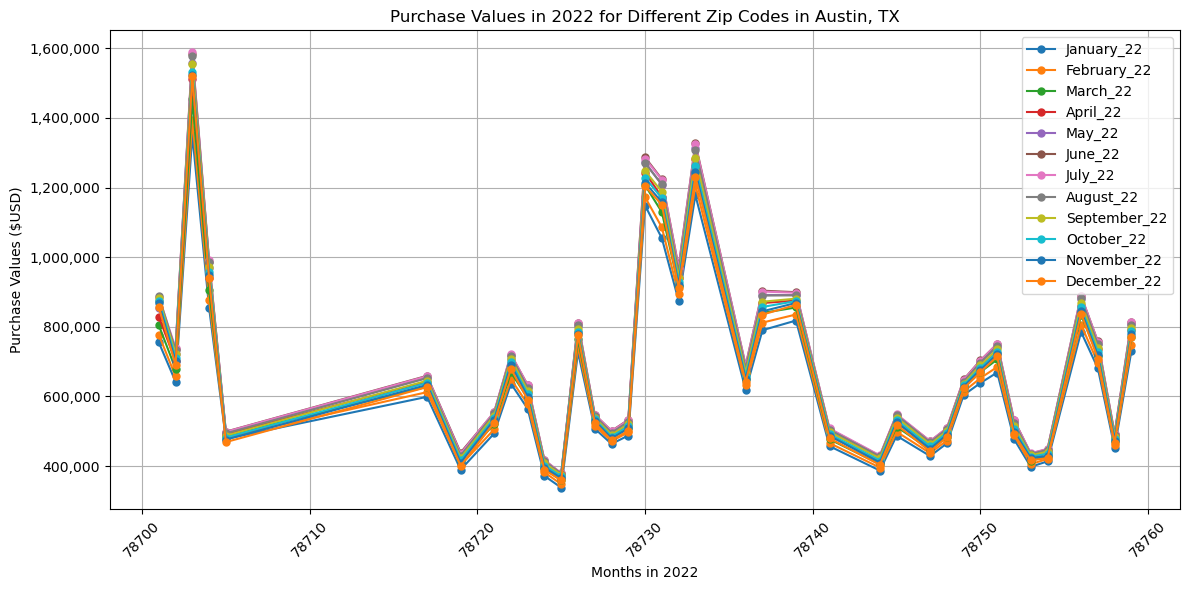

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extract the dates (months) as x_axis
x_axis = purchase_data_transposed2022.columns

# Transpose the 'purchase_data' DataFrame to have zip codes as rows and months as columns
purchase_data_transposed2021 = purchase_data_transposed2022.T

# Plotting
plt.figure(figsize=(12, 6))
for index, row in purchase_data_transposed2022.iterrows():
    plt.plot(x_axis, row, marker='o', markersize=5, label=index)

# Customize the plot
plt.xlabel('Months in 2022')
plt.ylabel('Purchase Values ($USD)')
plt.title('Purchase Values in 2022 for Different Zip Codes in Austin, TX')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.tight_layout()
plt.show()

In [16]:
purchase_columns = ["January_19","February_19","March_19","April_19","May_19",
                    "June_19","July_19","August_19","September_19","October_19",
                    "November_19","December_19",
                   
                   "January_21","February_21","March_21","April_21","May_21",
                    "June_21","July_21","August_21","September_21","October_21",
                    "November_21","December_21",
                   
                   "January_22","February_22","March_22","April_22","May_22",
                    "June_22","July_22","August_22","September_22","October_22",
                    "November_22","December_22"]


purchase_columns21 = ["January_21","February_21","March_21","April_21","May_21",
                    "June_21","July_21","August_21","September_21","October_21",
                    "November_21","December_21"]

purchase_columns22 = ["January_22","February_22","March_22","April_22","May_22",
                    "June_22","July_22","August_22","September_22","October_22",
                    "November_22","December_22"]

purchase_columns19 = ["January_19","February_19","March_19","April_19","May_19",
                    "June_19","July_19","August_19","September_19","October_19",
                    "November_19","December_19"]

purchase_columns21 = ["January_21","February_21","March_21","April_21","May_21",
                    "June_21","July_21","August_21","September_21","October_21",
                    "November_21","December_21"]

purchase_columns22 = ["January_22","February_22","March_22","April_22","May_22",
                    "June_22","July_22","August_22","September_22","October_22",
                    "November_22","December_22"]



In [17]:
# Extract the purchase columns for plotting
purchase_data2022 = zillow_df_2022[purchase_columns22]

# Transpose the 'purchase_data' DataFrame
purchase_data_transposed2022 = purchase_data2022.T


purchase_data_transposed2022

Zip Code,78759,78758,78757,78756,78754,78753,78752,78751,78750,78749,...,78723,78722,78721,78719,78717,78705,78704,78703,78702,78701
January_22,730037,452529,681141,785235,413508,397929,477522,668717,638661,603964,...,564478,636814,493569,389628,598850,478139,854837,1351246,642430,755370
February_22,747934,460940,696930,805689,420311,405655,488619,684603,652775,613877,...,577861,649586,505532,402110,612332,482758,876333,1394525,657839,777285
March_22,770634,471178,717366,833859,428541,414923,503293,706123,670178,625355,...,595550,668975,520542,415905,627687,487724,906761,1453043,679083,804601
April_22,791404,480161,735476,859901,436597,423535,516697,726090,685614,636119,...,612133,689391,534701,428218,642145,492185,939964,1510697,701289,829371
May_22,807579,488233,750541,879960,443798,431111,527797,742556,697695,644471,...,625928,708330,546758,435740,653488,496387,969211,1557564,722043,853693
June_22,814801,492558,758177,889075,448500,435937,532939,750943,703659,648766,...,632918,719631,554105,438667,659224,498825,986806,1584175,735479,872685
July_22,813088,492989,757454,888853,449314,436988,531264,751423,702920,647437,...,631948,721898,555288,435590,658096,498241,991839,1589036,739068,885991
August_22,805605,489374,749943,881357,446640,434616,523899,745476,697399,642850,...,625021,716863,551223,429877,652733,493855,986184,1577377,733036,887651
September_22,795705,484007,738525,868295,441343,430571,514317,735918,689449,636910,...,615466,708443,544590,423077,645206,487402,971838,1554296,721796,882278
October_22,786904,478418,727441,855491,435380,426763,506060,727206,682342,632447,...,607026,699368,537827,417081,638826,481695,958230,1532773,710562,875156


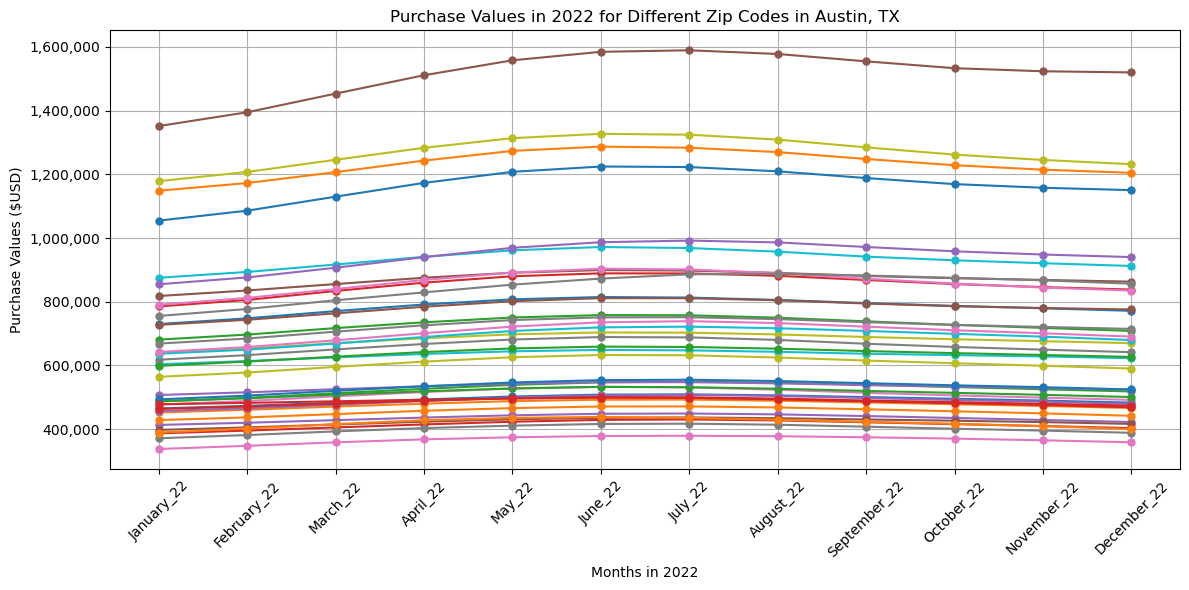

In [18]:
# Extract the dates (months) as x_axis
x_axis = purchase_data2022.columns


# Plotting
plt.figure(figsize=(12, 6))
for index, row in purchase_data2022.iterrows():
    plt.plot(x_axis, row, marker='o', markersize=5, label=index)


# Customize the plot
plt.xlabel('Months in 2022')
plt.ylabel('Purchase Values ($USD)')
plt.title('Purchase Values in 2022 for Different Zip Codes in Austin, TX')
plt.xticks(rotation=45)
plt.grid(True)
#plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#plt.ticklabel_format(style='plain', axis='y')


# Display the plot
plt.tight_layout()
plt.show()

In [19]:
# Extract the purchase columns for plotting
purchase_data2021 = zillow_df_2021[purchase_columns21]

# Transpose the 'purchase_data' DataFrame
purchase_data_transposed2021 = purchase_data2021.T

purchase_data_transposed2021.dropna(inplace=True)

purchase_data_transposed2021

Zip Code,78759,78758,78757,78756,78754,78753,78752,78751,78750,78749,...,78723,78722,78721,78719,78717,78705,78704,78703,78702,78701
January_21,633281,394824,575027,654476,339493,340751,409595,569357,567021,535835,...,471815,538426,410808,282803,487944,419265,660169,1070707,509601,598358
February_21,645984,402351,586473,663929,346794,347670,417454,579598,579254,544582,...,481922,548754,418739,291281,498071,422249,675286,1091482,520189,605231
March_21,659445,410069,598295,675102,354677,354900,425475,590808,591949,553706,...,493567,560756,426999,300916,510292,426382,692251,1115753,532585,612769
April_21,674460,418805,611340,689546,363763,362616,434365,604211,604953,563569,...,507250,574831,436821,311809,525071,431306,712891,1147060,549193,623766
May_21,691192,428578,625477,706357,374050,371571,444771,618844,618711,574911,...,521809,591508,448649,324255,542942,437033,737036,1182363,568659,638401
June_21,707073,438684,640309,724547,385102,380946,455416,633869,629318,586614,...,536496,608135,460829,339942,560271,441913,762163,1221390,588791,654940
July_21,716257,445661,651906,739383,393558,387906,462980,644714,633447,594702,...,546710,620522,470291,353630,572669,447839,783375,1252667,604600,672815
August_21,717360,448346,658236,748537,398720,391016,466034,649934,630891,597571,...,550673,625894,474541,363581,578424,452162,796586,1273247,613471,688626
September_21,712965,446860,659033,751558,400796,390361,465391,649764,625358,595708,...,549178,625116,475250,367705,578997,456644,804557,1281893,616909,702229
October_21,709537,444705,659717,754517,402362,388927,464966,649665,621732,593099,...,548407,624334,476210,370651,579230,460735,811869,1290709,619476,712659


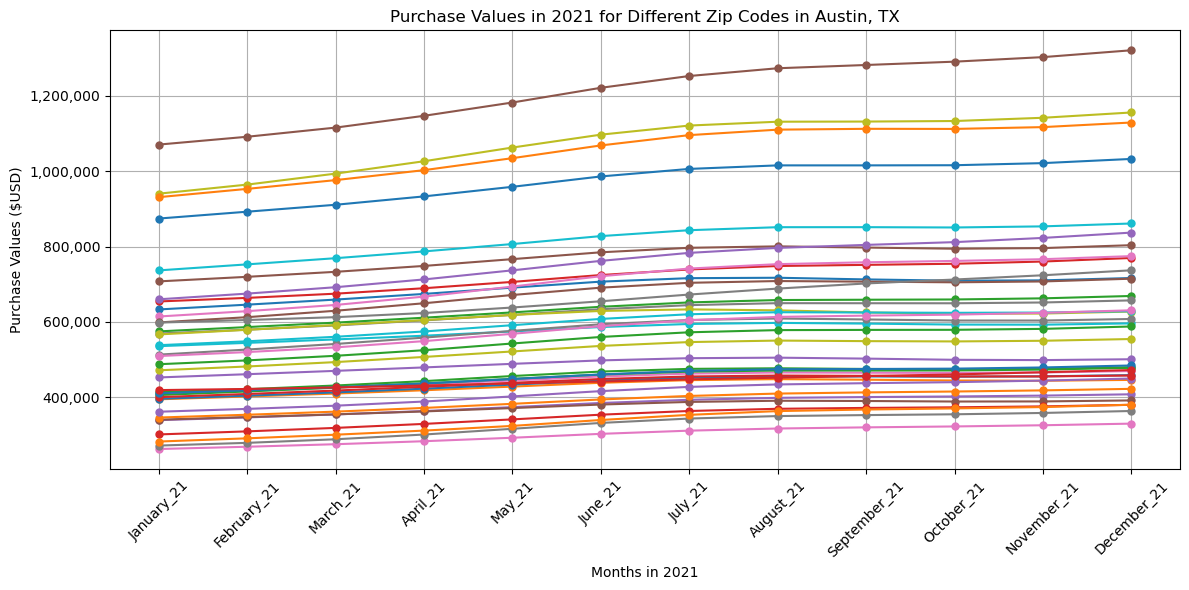

In [20]:
# Extract the purchase columns for plotting
purchase_data2021 = zillow_df_2021[purchase_columns21]

# Extract the dates (months) as x_axis
x_axis = purchase_data2021.columns


# Plotting
plt.figure(figsize=(12, 6))
for index, row in purchase_data2021.iterrows():
    plt.plot(x_axis, row, marker='o', markersize=5, label=index)


# Customize the plot
plt.xlabel('Months in 2021')
plt.ylabel('Purchase Values ($USD)')
plt.title('Purchase Values in 2021 for Different Zip Codes in Austin, TX')
plt.xticks(rotation=45)
plt.grid(True)
#plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#plt.ticklabel_format(style='plain', axis='y')


# Display the plot
plt.tight_layout()
plt.show()

In [21]:
zillow_df_combined = pd.concat([zillow_df_2022, zillow_df_2021, zillow_df_2019], axis=1)
zillow_df_combined.sort_index(ascending=False, inplace=True)
zillow_df_combined.dropna(inplace=True)
zillow_df_combined.head()

,State,City,CountyName,January_22,February_22,March_22,April_22,May_22,June_22,July_22,...,April_19,May_19,June_19,July_19,August_19,September_19,October_19,November_19,December_19,Year
Zip Code,,,,,,,,,,,,,,,,,,,,,
78759,TX,Austin,Travis County,730037,747934,770634,791404,807579,814801,813088,...,537899,540109,542289,544585,546651,549189,552409,555662,559071,2019
78758,TX,Austin,Travis County,452529,460940,471178,480161,488233,492558,492989,...,315376,317524,319850,322342,324659,327210,329972,333039,336427,2019
78757,TX,Austin,Travis County,681141,696930,717366,735476,750541,758177,757454,...,477276,479433,481344,482945,485377,488306,491701,495381,499043,2019
78756,TX,Austin,Travis County,785235,805689,833859,859901,879960,889075,888853,...,547243,550308,553599,556161,559459,563248,567780,572345,576002,2019
78754,TX,Austin,Travis County,413508,420311,428541,436597,443798,448500,449314,...,287075,287528,288206,288843,289394,290230,291804,293550,295567,2019


In [ ]:
# Assuming your data is in a CSV file named 'data.csv', you can read it into a DataFrame
df = pd.read_csv('data.csv')

# Find the maximum zip code
max_zipcode = df['Zip Code'].max()

# Find the minimum zip code
min_zipcode = df['Zip Code'].min()

print(f"Maximum Zip Code: {max_zipcode}")
print(f"Minimum Zip Code: {min_zipcode}")

In [ ]:
# # Extract the purchase columns for plotting
# purchase_data_c = zillow_df_combined[purchase_columns]

# # Transpose the 'purchase_data' DataFrame
# purchase_data_t_c = purchase_data_c.T


# # Save the transposed DataFrame to a CSV file in the specified folder location
# file_name = 'transposed_purchase_data.csv'
# file_path = folder_location + file_name

# purchase_data_t_c.to_csv(file_path, index=True)  

# purchase_data_t_c.head()


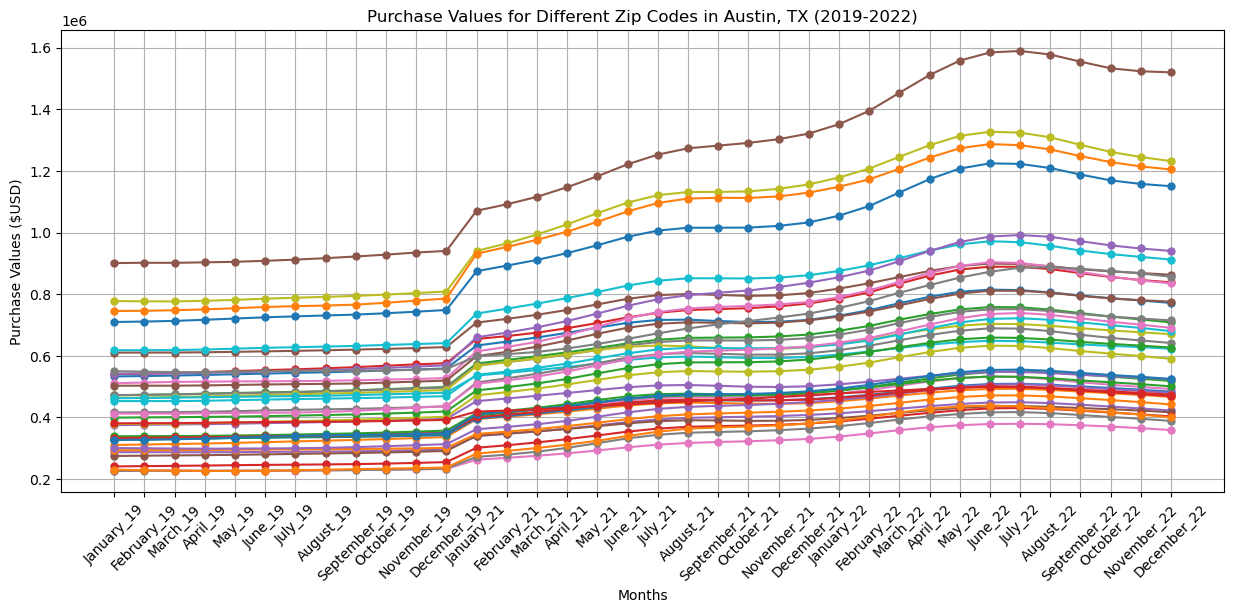

In [24]:
# Extract the purchase columns for plotting
purchase_data_t_c = zillow_df_combined[purchase_columns]

# Extract the dates (months) as x_axis

x_axis = purchase_data_t_c.columns


# # Plotting
plt.figure(figsize=(15, 6))
for index, row in purchase_data_t_c.iterrows():
    plt.plot(x_axis, row, marker='o', markersize=5, label=index)



# Customize the plot
plt.xlabel('Months')
plt.ylabel('Purchase Values ($USD)')
plt.title('Purchase Values for Different Zip Codes in Austin, TX (2019-2022)')
plt.xticks(rotation=45)
plt.grid(True)
#plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Show the legend
#plt.legend(loc='best')

# Display the plot
#plt.tight_layout()
plt.show()



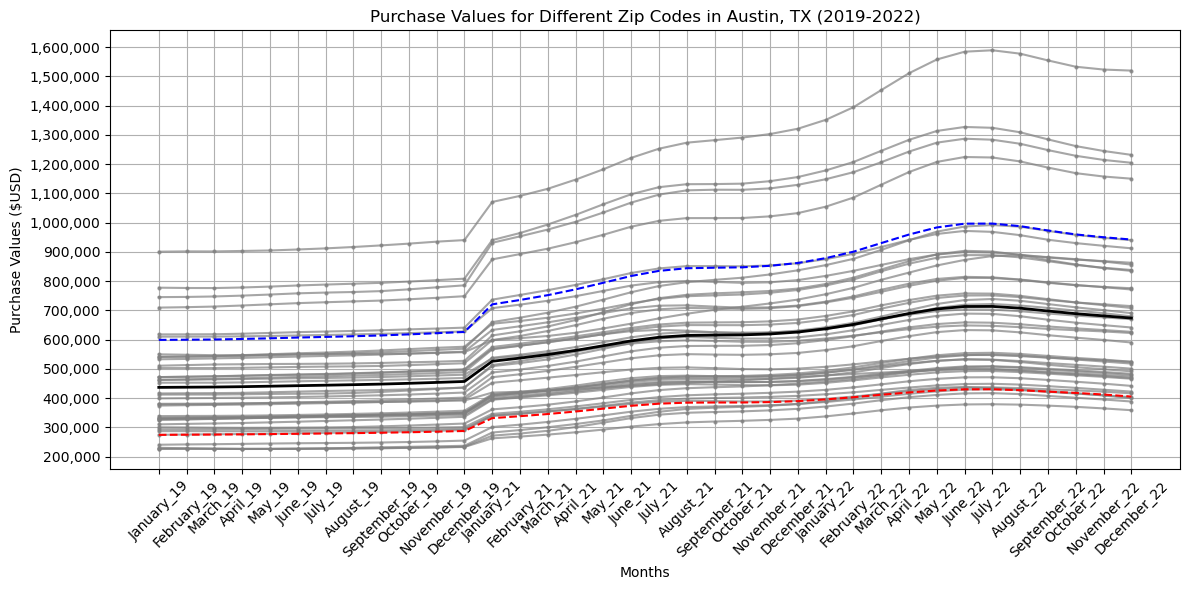

In [25]:

# Extract the dates (months) as x_axis
x_axis = purchase_data_t_c.columns

# Calculate mean and standard deviation for each month across zip codes
mean_values = purchase_data_t_c.mean(axis=0)
std_plus_one = purchase_data_t_c.mean(axis=0) + purchase_data_t_c.std(axis=0)
std_minus_one = purchase_data_t_c.mean(axis=0) - purchase_data_t_c.std(axis=0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for each zip code for all years
for index, row in purchase_data_t_c.iterrows():
    plt.plot(x_axis, row, marker='o', color='gray', markersize=2, label=f'{index} (All Years)', alpha=0.7)

# Plot mean line
plt.plot(x_axis, mean_values, color='black', linewidth=2, label='Mean')

# Plot standard deviation +1 line
plt.plot(x_axis, std_plus_one, color='blue', linestyle='dashed', linewidth=1.5, label='Mean +1 std')

# Plot standard deviation -1 line
plt.plot(x_axis, std_minus_one, color='red', linestyle='dashed', linewidth=1.5, label='Mean -1 std')

# Customize the plot
plt.xlabel('Months')
plt.ylabel('Purchase Values ($USD)')
plt.title('Purchase Values for Different Zip Codes in Austin, TX (2019-2022)')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# Move gridlines up by 100K (100000)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=100000))

# Show the legend
#plt.legend(loc='best')

# Display the plot
plt.tight_layout()
plt.show()



In [33]:
# Get the path to the current Python file
file_path = os.path.abspath("zillow_df_combined.csv")

# Get the parent directory (one level up)
folder1_up = os.path.dirname(file_path)
folder2_up = os.path.dirname(folder1_up)

folder2_up

'/Users/Alejandrodavila/Desktop/Project1_AD'

In [35]:
# Starting directory where you want to begin the search
starting_directory = folder2_up
zillow_file = os.path.join(folder2_up,"P1_Resources","HousingData19_20_21.csv")

# Save to a CSV file
zillow_df_combined.to_csv(zillow_file, index=True)  # Set index=True to include row names (months) as a column
